# **Vision and Perception**
Name: Pietro

Last Name: Cassieri

Mat: 63330


Name: Sabino

Last Name: Giancristiano

Mat: 63331

Name: Edoardo Mariano

Last Name: Golluscio

Mat: 63332


# **Hard Hat detection using YOLOv5**

## **Configuration**

**In this section we will proceed to configure the root folder and install the requirements for yolov5**

Remember to change the runtime type: from Runtime menu select Change runtime type and choose GPU as Hardware accelerator.

**All the configuration files are contained in the drive, so we will proceed to mount Google Drive on the Colab session,**

> **ADVICE**: *copy the root [**folder**](https://drive.google.com/drive/folders/1WgcSBIo03bFoYOVKMJ46_tXZ7OOxCVt4?usp=sharing) to your drive, and for a correct execution of the code, leave the parameters as they are.*








In [1]:
from google.colab import drive
print('Collego GDrive')
drive.mount('/content/gdrive')
root_folder = 'ProgettoVeP'#@param{type:"string"}
%cd /content/gdrive/MyDrive/$root_folder/

Collego GDrive
Mounted at /content/gdrive
/content/gdrive/MyDrive/ProgettoVeP


In [2]:
#@title Install requirements, but you need to restart runtime end re-run the cells
!git clone https://github.com/ultralytics/yolov5
!pip install -r yolov5/requirements.txt  # install
import torch
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

fatal: destination path 'yolov5' already exists and is not an empty directory.
     |████████████████████████████████| 596 kB 4.3 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Setup complete. Using torch 1.9.0+cu111 (Tesla K80)


## **Training**

**The pre_trained weights are used to speed up training, their use is possible thanks to the transfer learning, consists of using pre-trained layers to construct a different network that migth have similarities in the first layers.**

reasons:

* You want to analyse something different in a dataset that was used to train another network,
* You want to perform classification in a class that was used to train a certain network but was not annotated before,
* You want to train a network for a problem similar to the other one and don't have time or computational power to retrain all layers.

In [ ]:
epoch_number = 300 #@param {type:"slider", min:100, max:10000, step:20}
option = 'START TRAINING FROM BEGINNING' #@param ["START TRAINING FROM BEGINNING", "RESUME TRAINING"]
weight = 'yolov5s.pt' #@param["yolov5s.pt","yolov5m.pt","yolov5l.pt","yolov5x.pt"]
batch = 64 #@param {type:"slider", min:1, max:64, step:1}
#@markdown Choosing the resume option ignore the epoch option and the weight option will be ignored



if option == 'START TRAINING FROM BEGINNING':
    
    %rm -r /content/gdrive/MyDrive/$root_folder/risultato/exp
    !python /content/gdrive/MyDrive/$root_folder/yolov5/train.py --img 520 --batch $batch --epochs $epoch_number --data /content/gdrive/MyDrive/$root_folder/dataset/data.yaml --weights $weight --cache --project /content/gdrive/MyDrive/$root_folder/risultato/
    %rm -r /content/gdrive/MyDrive/$root_folder/lastTrain/exp
    %cp -r /content/gdrive/MyDrive/$root_folder/risultato/exp /content/gdrive/MyDrive/$root_folder/lastTrain/
else :
    !python /content/gdrive/MyDrive/$root_folder/yolov5/train.py --resume /content/gdrive/MyDrive/$root_folder/risultato/exp/weights/last.pt 
    %rm -r /content/gdrive/MyDrive/$root_folder/lastTrain/exp
    %cp -r /content/gdrive/MyDrive/$root_folder/risultato/exp /content/gdrive/MyDrive/$root_folder/lastTrain/

## **Show Metrics**


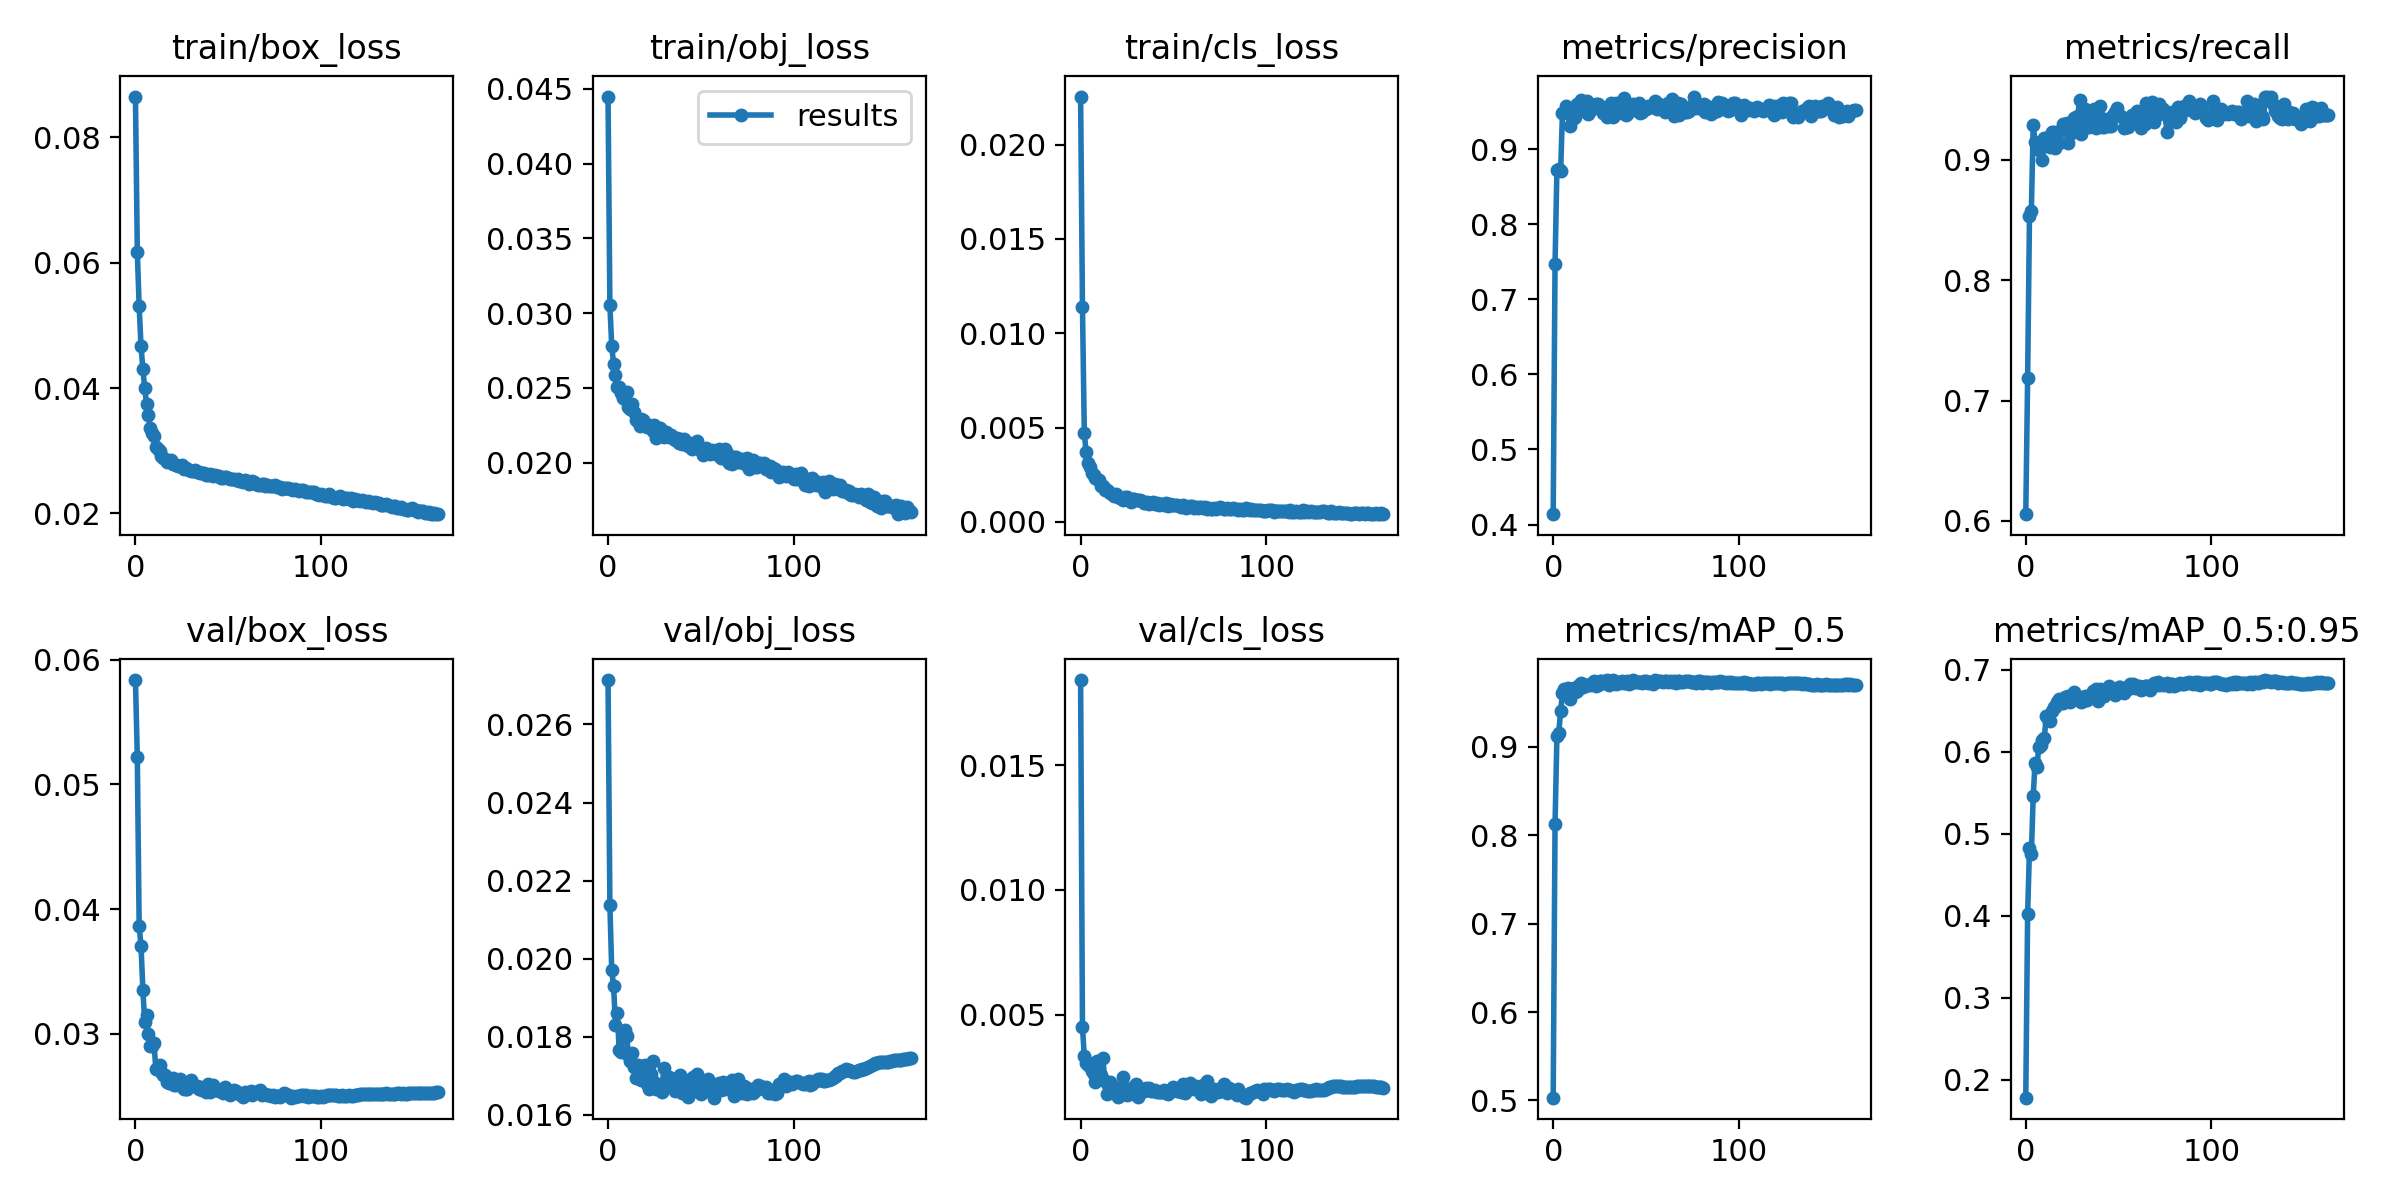

In [ ]:
#@title This will show the metrics of trained model
from PIL import Image
metrics = '/content/gdrive/MyDrive/'+root_folder+'/lastTrain/exp/results.png'

im = Image.open(metrics)
display(im)

In [3]:
#@title This calculates the metrics on a series of images called 'test'
%rm -r /content/gdrive/MyDrive/$root_folder/testResult/exp
!python /content/gdrive/MyDrive/$root_folder/yolov5/val.py --data /content/gdrive/MyDrive/$root_folder/testData/data.yaml --weights /content/gdrive/MyDrive/$root_folder/lastTrain/exp/weights/best.pt --project /content/gdrive/MyDrive/$root_folder/testResult/

rm: cannot remove '/content/gdrive/MyDrive/ProgettoVeP/testResult/exp': No such file or directory
val: data=/content/gdrive/MyDrive/ProgettoVeP/testData/data.yaml, weights=['/content/gdrive/MyDrive/ProgettoVeP/lastTrain/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=val, device=, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=/content/gdrive/MyDrive/ProgettoVeP/testResult/, name=exp, exist_ok=False, half=False
YOLOv5 🚀 v6.0-13-gfc36064 torch 1.9.0+cu111 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 224 layers, 7056607 parameters, 0 gradients
val: Scanning 'testData/test/labels.cache' images and labels... 116 found, 0 missing, 0 empty, 0 corrupted: 100% 116/116 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 4/4 [00:58<00:00, 14.53s/it]
                 all        116        477      0.879

## **Detection**

In [ ]:
video_name = 'construction.mp4' #@param {type:"string"}
#@markdown **Warning: put the video into the 'videos' directory**


!python /content/gdrive/MyDrive/$root_folder/yolov5/detect.py --source /content/gdrive/MyDrive/$root_folder/videos/$video_name --weights /content/gdrive/MyDrive/$root_folder/lastTrain/exp/weights/best.pt --project /content/gdrive/MyDrive/$root_folder/detection/

detect: weights=['/content/gdrive/MyDrive/ProgettoVeP/lastTrain/exp/weights/best.pt'], source=/content/gdrive/MyDrive/ProgettoVeP/videos/building-professional-employee-builder.jpg, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/gdrive/MyDrive/ProgettoVeP/detection/, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
requirements: /content/gdrive/MyDrive/ProgettoVeP/requirements.txt not found, check failed.
YOLOv5 🚀 v5.0-405-gfad57c2 torch 1.9.0+cu102 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 224 layers, 7056607 parameters, 0 gradients, 16.3 GFLOPs
image 1/1 /content/gdrive/MyDrive/ProgettoVeP/videos/building-professional-employee-builder.jpg: 448x640 1 helmet, Done. (0.070s)
Results saved to /content/gdrive/MyDrive/Proget